In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torchvision
import torchvision.transforms as transforms
import torch
import logging
from sklearn.model_selection import learning_curve

logging.basicConfig(level=logging.INFO)

# Function to load preprocessed MNIST data
def load_preprocessed_mnist_data():
    # Assuming the data is saved as PyTorch tensors
    train_data, train_targets = torch.load('D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\preprocessed\MNIST\preprocessed_train_mnist.pt')
    test_data, test_targets = torch.load('D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\preprocessed\MNIST\preprocessed_test_mnist.pt')

    # Convert tensors to numpy arrays for sklearn compatibility, and reshape images to 1D
    X_train = train_data.numpy().reshape(train_data.shape[0], -1)
    X_test = test_data.numpy().reshape(test_data.shape[0], -1)
    y_train = train_targets.numpy()
    y_test = test_targets.numpy()

    return X_train, X_test, y_train, y_test

# Load the data
X_train, X_test, y_train, y_test = load_preprocessed_mnist_data()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_30696\212707784.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data, train_targets = torch.load('D:\ASU\Fall 2024\EE

In [2]:
# Splitting data for validation (optional)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9585, 784)
(1984, 784)
(9585,)
(1984,)


In [3]:
def train_logistic_regression(X_train, y_train, X_val, y_val):
    # logging.info("Training Logistic Regression: penalty=none, solver=saga")
    lr_model = LogisticRegression(penalty=None, solver='saga', max_iter=1000)
    lr_model.fit(X_train, y_train)
    y_pred_val = lr_model.predict(X_val)
    # logging.info("Completed Training Logistic Regression")
    print("Validation Accuracy (Logistic Regression without reg):", accuracy_score(y_val, y_pred_val))
    return lr_model

def train_logistic_regression_l1(X_train, y_train, X_val, y_val):
    # logging.info("Training Logistic Regression: penalty=none, solver=saga")
    lr_model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=1.0)
    lr_model_l1.fit(X_train, y_train)
    y_pred_val = lr_model_l1.predict(X_val)
    # logging.info("Completed Training Logistic Regression")
    print("Validation Accuracy (Logistic Regression with L1):", accuracy_score(y_val, y_pred_val))
    return lr_model_l1

def train_logistic_regression_l2(X_train, y_train, X_val, y_val):
    # logging.info("Training Logistic Regression with L2 regularization: penalty=l2, solver=saga")
    lr_model_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, C=1.0)
    lr_model_l2.fit(X_train, y_train)
    y_pred_val_reg = lr_model_l2.predict(X_val)
    # logging.info("Completed Training Logistic Regression with L2")
    print("Validation Accuracy (Logistic Regression with L2):", accuracy_score(y_val, y_pred_val_reg))
    return lr_model_l2


In [4]:
lr_model = train_logistic_regression(X_train, y_train, X_val, y_val)
lr_model_l1 = train_logistic_regression_l1(X_train, y_train, X_val, y_val)
lr_model_l2 = train_logistic_regression_l2(X_train, y_train, X_val, y_val)

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (Logistic Regression without reg): 0.9645390070921985


d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Validation Accuracy (Logistic Regression with L1): 0.9645390070921985
Validation Accuracy (Logistic Regression with L2): 0.9645390070921985


d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [5]:
y_pred_test_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
print("Test Accuracy (Logistic Regression without reg):", test_accuracy_lr)
print(classification_report(y_test, y_pred_test_lr))

Test Accuracy (Logistic Regression without reg): 0.9616935483870968
              precision    recall  f1-score   support

           3       0.96      0.97      0.96      1010
           8       0.96      0.96      0.96       974

    accuracy                           0.96      1984
   macro avg       0.96      0.96      0.96      1984
weighted avg       0.96      0.96      0.96      1984



In [6]:
y_pred_test_lr_1 = lr_model_l1.predict(X_test)
test_accuracy_lr_1 = accuracy_score(y_test, y_pred_test_lr_1)
print("Test Accuracy (Logistic Regression without L1):", test_accuracy_lr_1)
print(classification_report(y_test, y_pred_test_lr_1))

Test Accuracy (Logistic Regression without L1): 0.9616935483870968
              precision    recall  f1-score   support

           3       0.96      0.97      0.96      1010
           8       0.96      0.96      0.96       974

    accuracy                           0.96      1984
   macro avg       0.96      0.96      0.96      1984
weighted avg       0.96      0.96      0.96      1984



In [7]:
y_pred_test_lr_2 = lr_model_l2.predict(X_test)
test_accuracy_lr_2 = accuracy_score(y_test, y_pred_test_lr_2)
print("Test Accuracy (Logistic Regression L2):", test_accuracy_lr_2)
print(classification_report(y_test, y_pred_test_lr_2))

Test Accuracy (Logistic Regression L2): 0.9616935483870968
              precision    recall  f1-score   support

           3       0.96      0.97      0.96      1010
           8       0.96      0.96      0.96       974

    accuracy                           0.96      1984
   macro avg       0.96      0.96      0.96      1984
weighted avg       0.96      0.96      0.96      1984



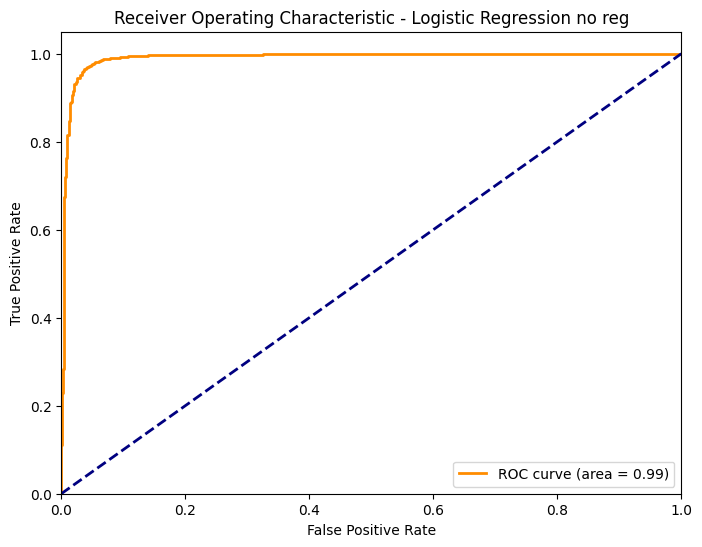

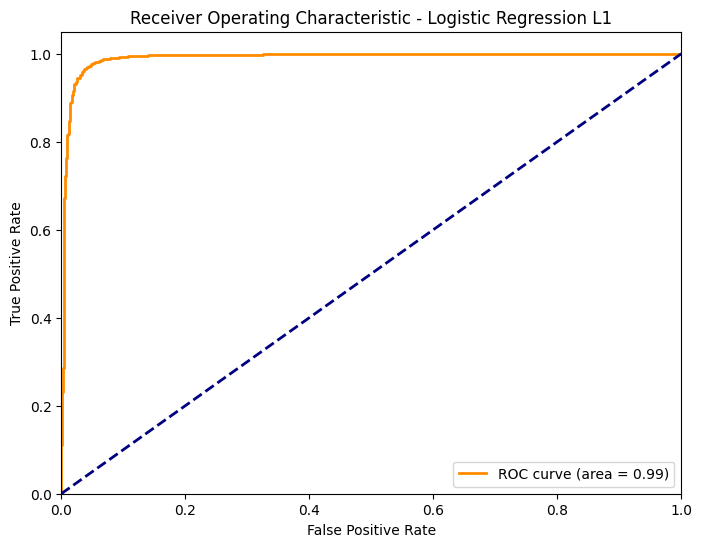

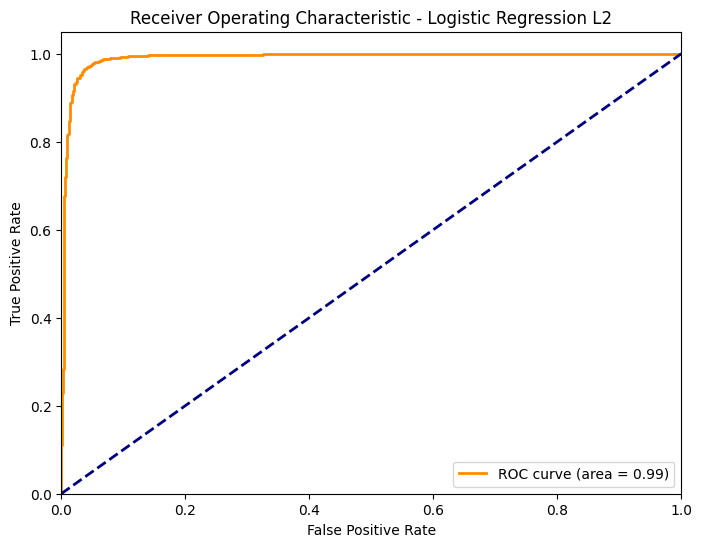

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, scores, model_name, pos_label):
    # Generate ROC curve data with the correct positive label
    fpr, tpr, _ = roc_curve(y_test, scores, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    # plt.savefig(f'D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\Output graphs\MNIST\ROC\ROC_{model_name.replace(" ", "_")}.png')
    plt.show()


# Logistic Regression (no regularization)
y_scores_lr = lr_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L1 regularization
y_scores_lr_1 = lr_model_l1.predict_proba(X_test)[:, 1]  # index 1 for the positive class probabilities

# Logistic Regression with L2 regularization
y_scores_lr_l2 = lr_model_l2.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test, y_scores_lr, "Logistic Regression no reg", pos_label=8)
plot_roc_curve(y_test, y_scores_lr_1, "Logistic Regression L1", pos_label=8)
plot_roc_curve(y_test, y_scores_lr_l2, "Logistic Regression L2", pos_label=8)

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fal

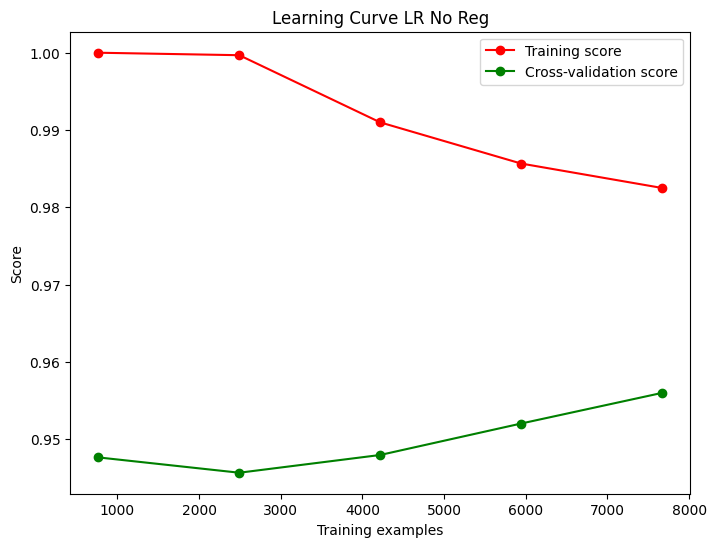

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fal

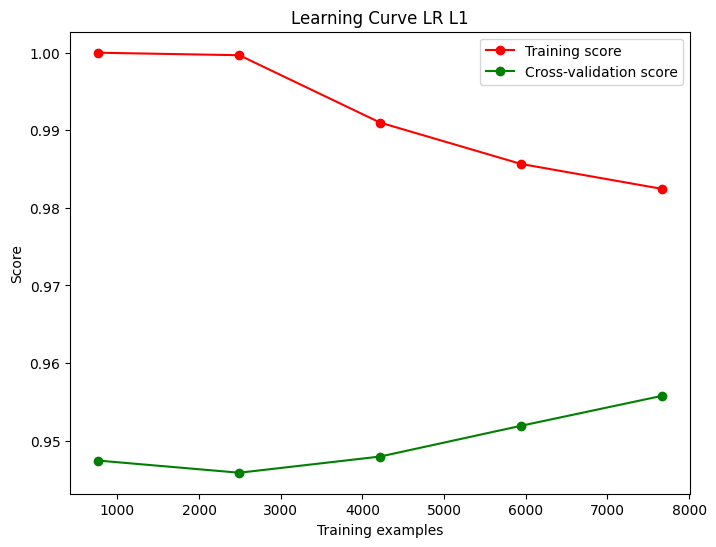

d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fall 2024\EEE549\Notebooks\HW0\.conda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ASU\Fal

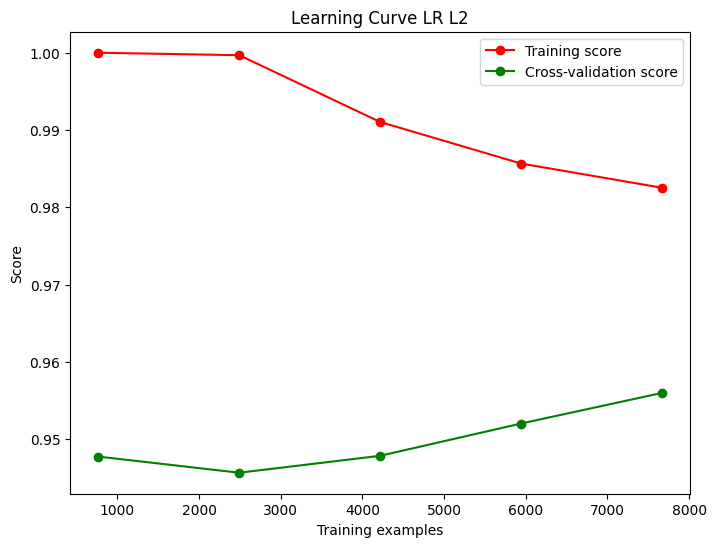

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    # plt.savefig(f'D:\ASU\Fall 2024\EEE549\Final term project\sml-final\data\Output graphs\MNIST\learning curve\Learning_Curve_{title.replace(" ", "_")}.png')
    plt.show()

# Example calls
plot_learning_curve(LogisticRegression(penalty=None, solver='saga', max_iter=1000), "Learning Curve LR No Reg", X_train, y_train, cv=5)
plot_learning_curve(LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=1000), "Learning Curve LR L1", X_train, y_train, cv=5)
plot_learning_curve(LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=1000), "Learning Curve LR L2", X_train, y_train, cv=5)